In [2]:
import numpy as np
import fitsio
import proplot as pplt
import glob

In [3]:
import random

fnames = sorted(glob.glob("./data_final_nogcut/*.fits"))
n_keep = 2

random.shuffle(fnames)

In [4]:
import tqdm

d = []
for i in tqdm.trange(n_keep):
    d.append(fitsio.read(fnames[i]))
d = np.concatenate(d)

100%|██████████| 2/2 [00:07<00:00,  3.50s/it]


Text(0, 0.5, 'T/Tpsf')

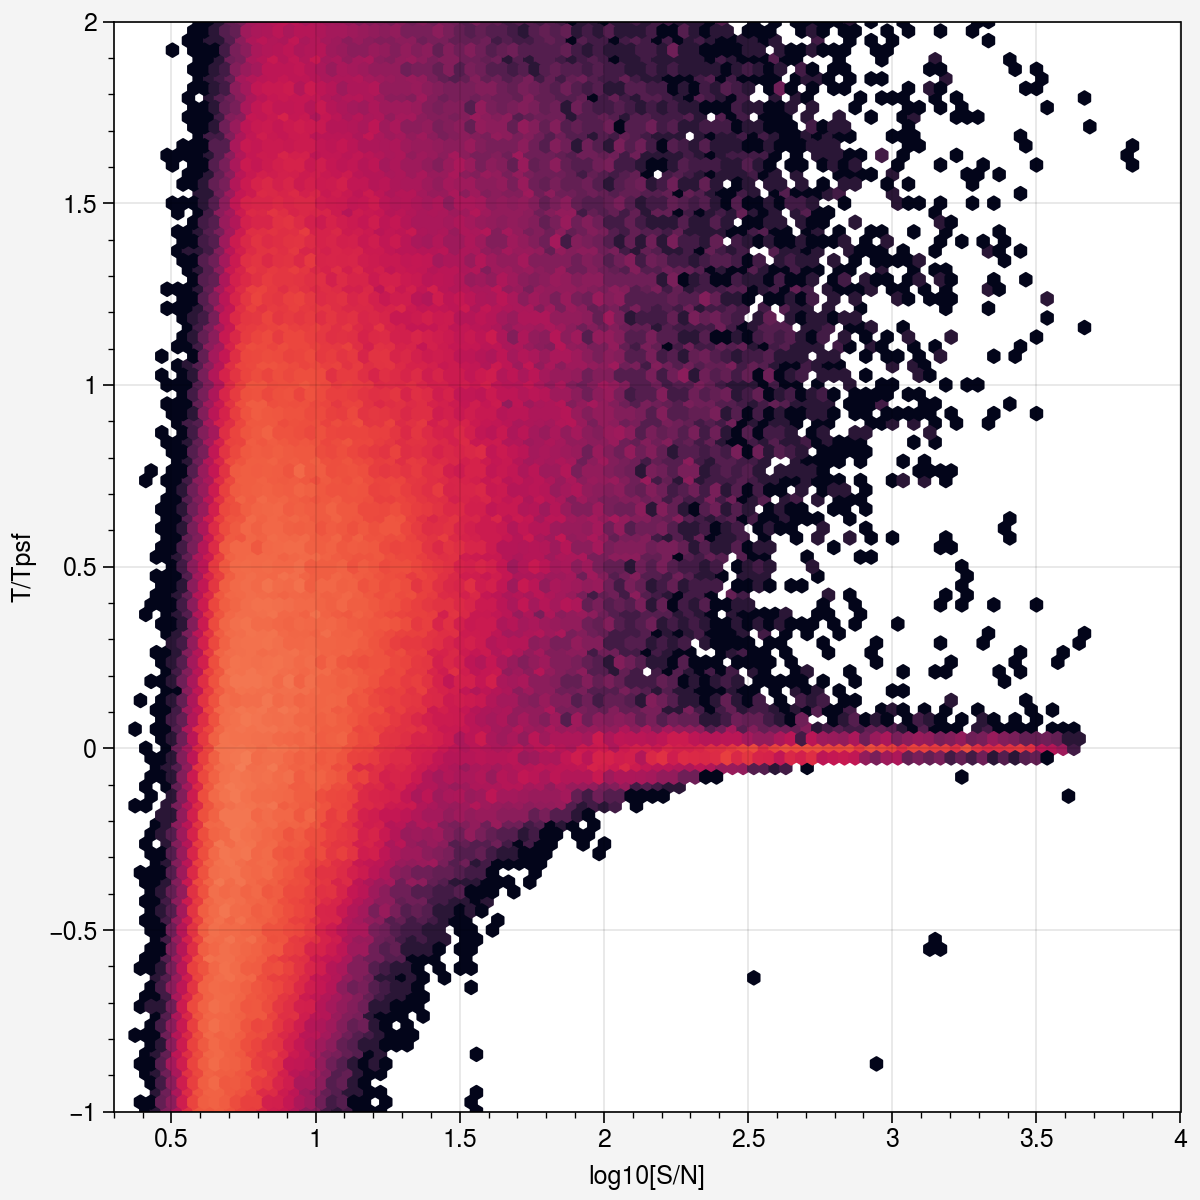

In [5]:
msk = (
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 2)
)

fig, axs = pplt.subplots(figsize=(6, 6))
axs.hexbin(
    np.log10(d["mdet_s2n"][msk]), 
    d["mdet_T_ratio"][msk], 
    bins=100, 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -1, 2)
)
# axs.axhline(np.log10(0.5), color="cyan")
axs.set_ylim(-1, 2)
axs.set_xlim(0.3, 4)
axs.set_xlabel("log10[S/N]")
axs.set_ylabel("T/Tpsf")

Text(0, 0.5, 'T')

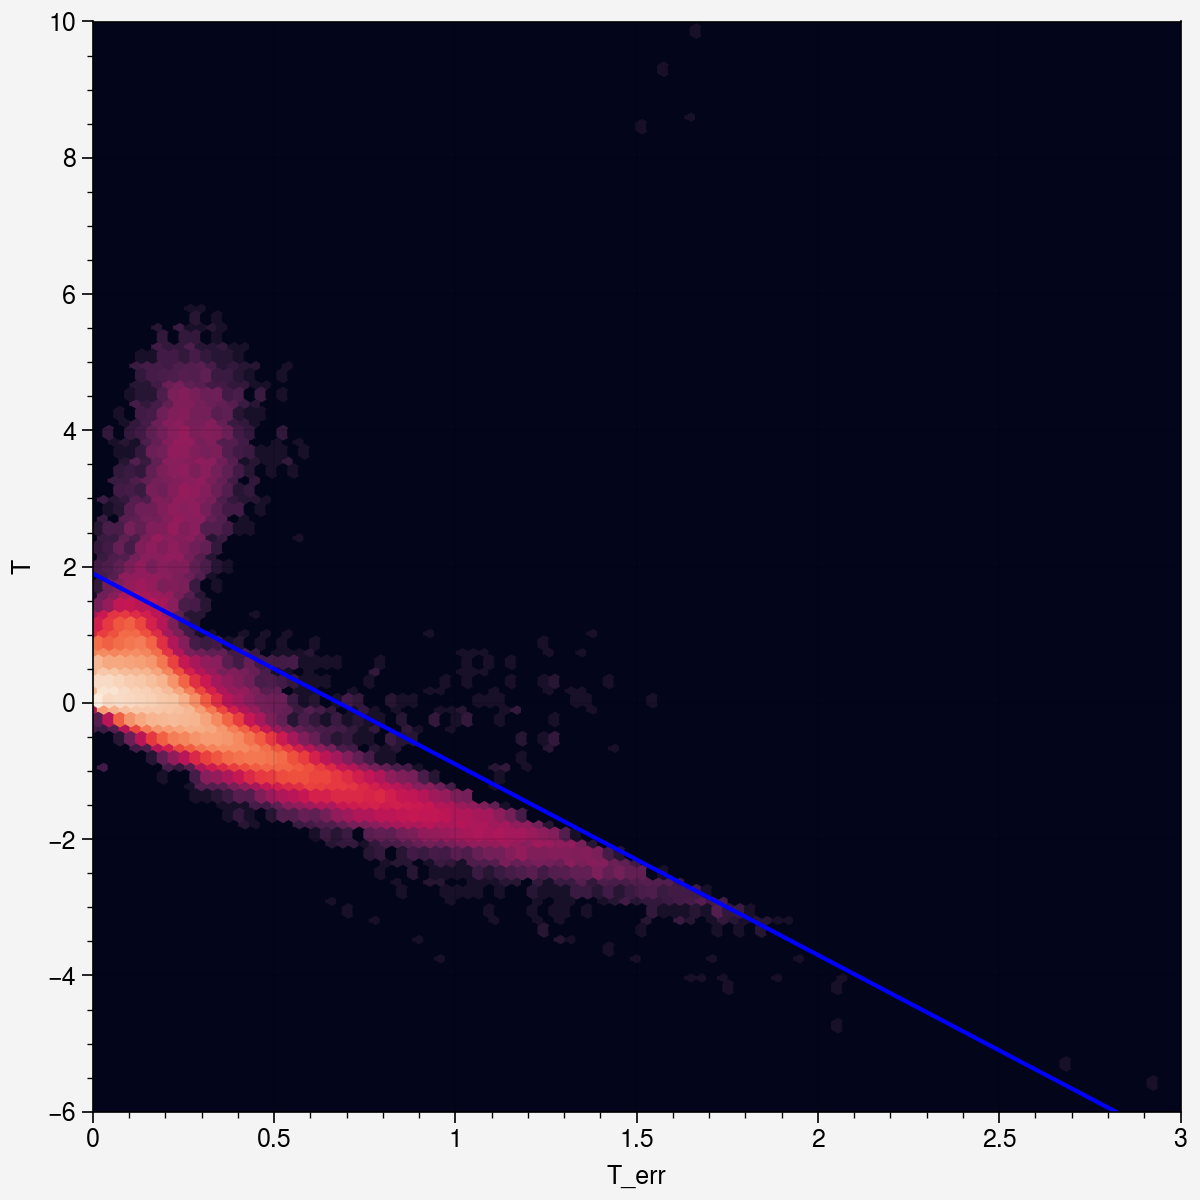

In [23]:
xv = np.linspace(0, 3, 100)
yv = 1.9 - 2.8*xv

msk = (
    # (d["mdet_flags"] == 0)
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 2)
)

fig, axs = pplt.subplots(figsize=(6, 6))
axs.hexbin(
    d["mdet_T_err"][msk], 
    d["mdet_T"][msk], 
    norm="log",
    N=100,
    discrete=False,
    cmap="rocket",
    extent=(0, 3, -6, 10)
)
axs.plot(xv, yv, color="blue")
# axs.axhline(np.log10(0.5), color="cyan")
axs.set_ylim(-6, 10)
axs.set_xlim(0, 3)
axs.set_xlabel("T_err")
axs.set_ylabel("T")